# Exploratory Data Analysis

In [ ]:
#!pip install plotly
#!pip install cufflinks
#!pip install numpy
#!pip install pandas
#!pip install maplotlib
#!pip install seaborn
#!pip install showast
#!pip install DateTime

In [1]:
# Inport all the imporatant library
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string 
import ast
from datetime import datetime
import plotly.offline as py
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

# Movie_metadata Dataset

In [2]:
import pandas as pd
missing_values = ['na','--','?','-','None','none','non']
movie_df = pd.read_csv('movies_metadata.csv', na_values=missing_values)
movie_df = movie_df.drop(columns=['poster_path', 'imdb_id', 'runtime', 'status', 'belongs_to_collection', 'homepage','tagline', 
                                  'adult', 'overview', 'video', 'vote_average', 'vote_count','spoken_languages']).reset_index(drop=True)

movie_df.head()

C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



budget                                             genres     id  \
0  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862   
1  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   8844   
2         0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  15602   
3  16000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  31357   
4         0                     [{'id': 35, 'name': 'Comedy'}]  11862   

  original_language               original_title popularity  \
0                en                    Toy Story    21.9469   
1                en                      Jumanji    17.0155   
2                en             Grumpier Old Men    11.7129   
3                en            Waiting to Exhale    3.85949   
4                en  Father of the Bride Part II    8.38752   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries release_date  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-02-10   

       revenue                        title  
0  373554033.0                    Toy Story  
1  262797249.0                      Jumanji  
2          0.0             Grumpier Old Men  
3   81452156.0            Waiting to Exhale  
4   76578911.0  Father of the Bride Part II

In [3]:
movie_df.shape

(45466, 11)

### Information-1: Top 10 profited movies 

In [5]:
Profited_movies = movie_df.drop(columns=['genres', 'original_language', 'popularity', 'production_companies', 'production_countries',
                                  'release_date']).reset_index(drop=True)


Profited_movies['budget'] = pd.to_numeric(Profited_movies['budget'], errors = 'coerce')
# revenue is already a float
Profited_movies.loc[(Profited_movies['budget'] == 0) & (Profited_movies['revenue'] == 0), 'revenue'] = np.nan
Profited_movies.loc[Profited_movies['budget'] == 0, 'budget'] = np.nan

Profited_movies[Profited_movies['budget'] < 100]['budget'].count()

138

In [6]:
def scale(num):
    if num < 100:
        return num * 1000000
    elif num >= 100 and num < 1000:
        return num * 1000
    else:
        return num

Profited_movies[['budget', 'revenue']] = Profited_movies[['budget', 'revenue']].applymap(scale)


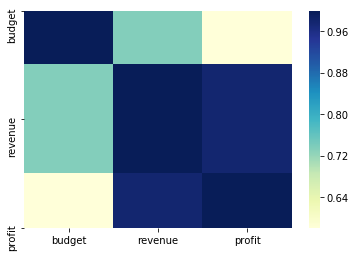

In [7]:
Profited_movies['profit'] = Profited_movies['revenue'] - Profited_movies['budget']
sns.heatmap(Profited_movies.corr(), cmap = 'YlGnBu')

In [8]:
Profited_movies.head(10)

budget     id               original_title      revenue  \
0  30000000.0    862                    Toy Story  373554033.0   
1  65000000.0   8844                      Jumanji  262797249.0   
2         NaN  15602             Grumpier Old Men          NaN   
3  16000000.0  31357            Waiting to Exhale   81452156.0   
4         NaN  11862  Father of the Bride Part II   76578911.0   
5  60000000.0    949                         Heat  187436818.0   
6  58000000.0  11860                      Sabrina          0.0   
7         NaN  45325                 Tom and Huck          NaN   
8  35000000.0   9091                 Sudden Death   64350171.0   
9  58000000.0    710                    GoldenEye  352194034.0   

                         title       profit  
0                    Toy Story  343554033.0  
1                      Jumanji  197797249.0  
2             Grumpier Old Men          NaN  
3            Waiting to Exhale   65452156.0  
4  Father of the Bride Part II          NaN  
5                         Heat  127436818.0  
6                      Sabrina  -58000000.0  
7                 Tom and Huck          NaN  
8                 Sudden Death   29350171.0  
9                    GoldenEye  294194034.0

### Information-2: Top 10 most popular movies

In [10]:
popular_movies = movie_df.drop(columns=['budget', 'original_language', 'production_companies', 'production_countries', 'release_date', 'revenue'
                                ]).reset_index(drop=True)
# Converted Object datatype into the Int datatype

popular_movies[popular_movies['popularity'].isnull()]
popular_movies['popularity'] = pd.to_numeric(popular_movies['popularity'], errors='coerce')
popular_movies = popular_movies.dropna(subset=['popularity'])
popular_movies['popularity'] = popular_movies['popularity'].astype(int)
print(popular_movies.dtypes)

Popular_movies = popular_movies.sort_values(by = 'popularity', axis=0, ascending=False, kind='quicksort', na_position='first')
Popular_movies.head(10)

genres            object
id                object
original_title    object
popularity         int32
title             object
dtype: object


genres      id  \
30700  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...  211672   
33356  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  297762   
42222  [{'id': 10751, 'name': 'Family'}, {'id': 14, '...  321612   
43644  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...  339403   
24455  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...  177572   
26564  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  293660   
14551  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   19995   
26566  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  283995   
24351  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...  245891   
23675  [{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...  210577   

                       original_title  popularity  \
30700                         Minions         547   
33356                    Wonder Woman         294   
42222            Beauty and the Beast         287   
43644                     Baby Driver         228   
24455                      Big Hero 6         213   
26564                        Deadpool         187   
14551                          Avatar         185   
26566  Guardians of the Galaxy Vol. 2         185   
24351                       John Wick         183   
23675                       Gone Girl         154   

                                title  
30700                         Minions  
33356                    Wonder Woman  
42222            Beauty and the Beast  
43644                     Baby Driver  
24455                      Big Hero 6  
26564                        Deadpool  
14551                          Avatar  
26566  Guardians of the Galaxy Vol. 2  
24351                       John Wick  
23675                       Gone Girl

### Information-3: Top 10 preferable language

original_language
en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
ru      826
hi      508
ko      444
zh      409
dtype: int64


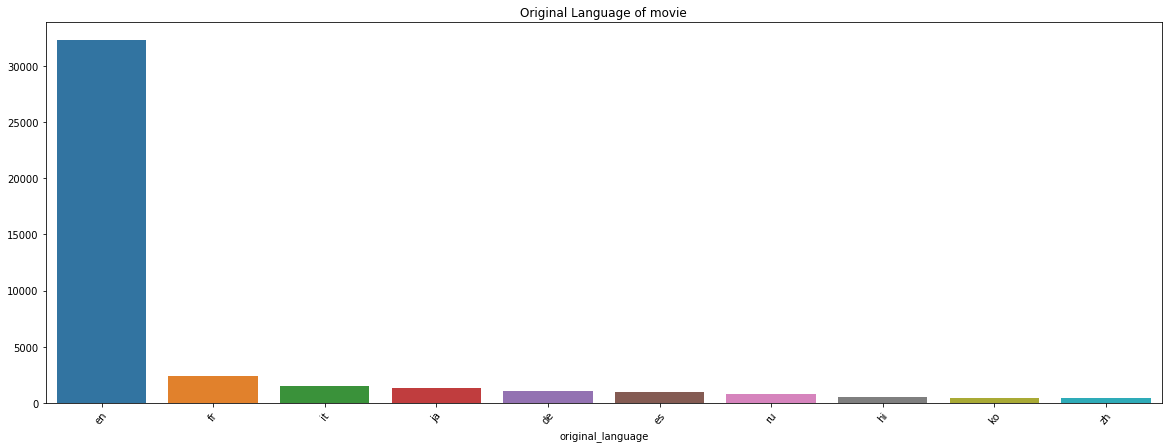

In [11]:
plt.figure(figsize=(20,7))
movie_original_language = movie_df.groupby('original_language').size().sort_values(ascending=False)
top_10_highest_language_movie = movie_original_language.head(10)
print(top_10_highest_language_movie)
sns.barplot(top_10_highest_language_movie.index, top_10_highest_language_movie.values)
plt.title('Original Language of movie')
plt.xticks(rotation=50);

### Information-4: Which year has a highest release of movie?

release_date
2014.0    1974
dtype: int64


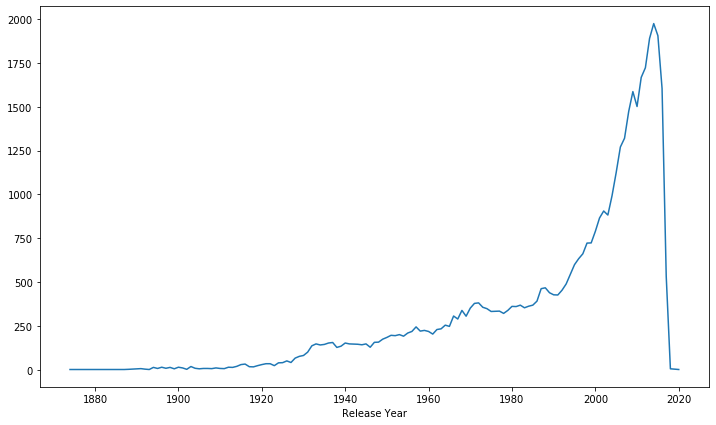

In [12]:
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'], errors='coerce')
movie_df['release_date'].dtypes

plt.figure(figsize=(12,7))
yearly_release_counts = movie_df.groupby(movie_df.release_date.dt.year).size().sort_values(ascending=False)
sns.lineplot(yearly_release_counts.index, yearly_release_counts.values);
plt.xlabel('Release Year')
print(yearly_release_counts.head(1))

### Information-5: Preferable weekday to release the movie

Text(0.5, 0, 'Release Day of Week')

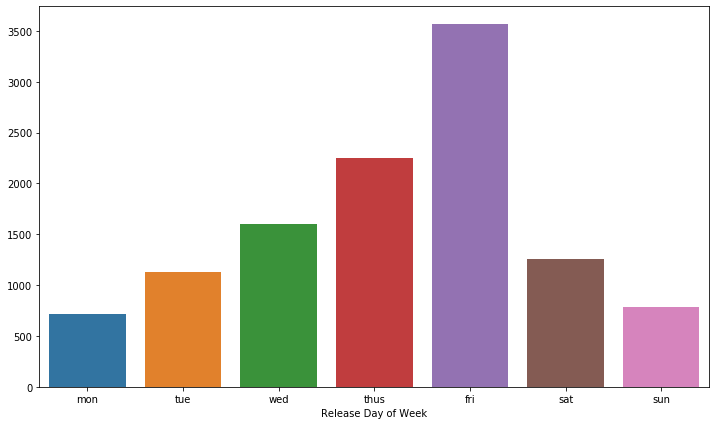

In [13]:
plt.figure(figsize=(12,7))
weekday_release_counts = movie_df[movie_df.release_date.dt.year > 2010].groupby(movie_df.release_date.dt.dayofweek).size()
sns.barplot(['mon', 'tue', 'wed', 'thus', 'fri', 'sat', 'sun'], weekday_release_counts.values);
plt.xlabel('Release Day of Week')

# Ratings and ratings_small Dataset

### Information-6: Top 10 rated movies

In [14]:
missing_values = ['na','--','?','-','None','none','non']
ratings_df = pd.read_csv('ratings.csv', na_values=missing_values)
ratings_small_df = pd.read_csv('ratings_small.csv', na_values=missing_values)
ratings_df.head()

userId  movieId  rating   timestamp
0       1      110     1.0  1425941529
1       1      147     4.5  1425942435
2       1      858     5.0  1425941523
3       1     1221     5.0  1425941546
4       1     1246     5.0  1425941556

In [15]:
ratings_small_df.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [16]:
ratings_df =ratings_small_df.copy(deep=True)
ratings_df.drop_duplicates() 
ratings_df.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

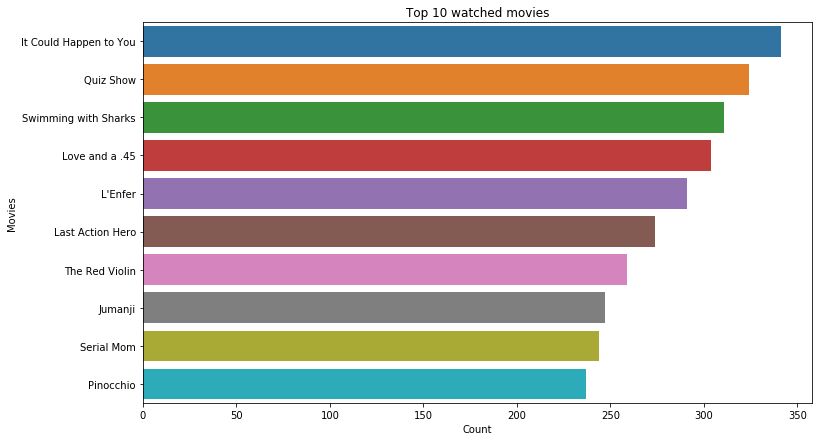

In [17]:
def draw_horizontal_movie_bar(movie_titles, ratings_count, title=''):
    plt.figure(figsize=(12, 7))
    sns.barplot(y=movie_titles, x=ratings_count, orient='h')
    plt.title(title)
    plt.ylabel('Movies')
    plt.xlabel('Count')
    plt.show()

top_ten_rated_movies = ratings_df.groupby('movieId').size().sort_values(ascending=False)[:10]
top_ten_movie_titles = movie_df.iloc[top_ten_rated_movies.index].title

draw_horizontal_movie_bar(top_ten_movie_titles.values, top_ten_rated_movies.values, 'Top 10 watched movies')

### Information-7: Data of Production Counties

In [18]:
movie_df['production_countries'] = movie_df['production_countries'].fillna('[]').apply(ast.literal_eval)
movie_df['production_countries'] = movie_df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [19]:
s = movie_df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [20]:
con_df = movie_df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)
con_df = con_df[con_df['country'] != 'United States of America']

In [21]:
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(0, 255, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
    colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [3]:
column_changes = ['production_companies', 'production_countries', 'genres']

json_shrinker_dict = dict({'production_companies': list(), 'production_countries': list(), 'genres': list()})
movie_df.dropna(inplace=True)

In [4]:
#Parsing JSONs for Extracting genres and production companies

for col in column_changes:
    if col == 'production_companies':
        for i in movie_df[col]:
            i = ast.literal_eval(i)
            if len(i) < 1:
                json_shrinker_dict['production_companies'].append(None)

            for element in i:
                json_shrinker_dict['production_companies'].append(element['name'])
                break
    elif col == 'production_countries':
        for i in movie_df[col]:
            i = ast.literal_eval(i)
            if len(i) < 1:
                json_shrinker_dict['production_countries'].append(None)
            for element in i:
                json_shrinker_dict['production_countries'].append(element['iso_3166_1'])
                break
    else:
        for i in movie_df[col]:
            i = ast.literal_eval(i)
            if len(i) < 1:
                json_shrinker_dict['genres'].append(None)

            for element in i:
                json_shrinker_dict['genres'].append(element['name'])
                break

for i in column_changes:
    movie_df[i] = json_shrinker_dict[i]

movie_df.dropna(inplace=True)

movie_df['budget'] = movie_df['budget'].astype(int)

In [5]:
movie_df.head()

budget     genres     id original_language               original_title  \
0  30000000  Animation    862                en                    Toy Story   
1  65000000  Adventure   8844                en                      Jumanji   
2         0    Romance  15602                en             Grumpier Old Men   
3  16000000     Comedy  31357                en            Waiting to Exhale   
4         0     Comedy  11862                en  Father of the Bride Part II   

  popularity                    production_companies production_countries  \
0    21.9469                 Pixar Animation Studios                   US   
1    17.0155                        TriStar Pictures                   US   
2    11.7129                            Warner Bros.                   US   
3    3.85949  Twentieth Century Fox Film Corporation                   US   
4    8.38752                   Sandollar Productions                   US   

  release_date      revenue                        title  
0   1995-10-30  373554033.0                    Toy Story  
1   1995-12-15  262797249.0                      Jumanji  
2   1995-12-22          0.0             Grumpier Old Men  
3   1995-12-22   81452156.0            Waiting to Exhale  
4   1995-02-10   76578911.0  Father of the Bride Part II

In [6]:
fig = px.scatter(movie_df, x='budget', y='revenue', hover_data=['title'], color='genres', width=800, height=800)
fig.update_layout(
    title='The Relationship between Budget and Revenue',
    xaxis_title='Budget',
    yaxis_title='Revenue',
    font=dict(
        size=16
    )
)
iplot(fig)

### Information-8: Calculate movie budget according genere

In [7]:
genre_budget_df = movie_df.groupby(['genres'])['budget'].sum()

fig = go.Figure([
    go.Bar(
        x=genre_budget_df.index,
        y=genre_budget_df.values,
        text=genre_budget_df.values,
        textposition='auto',
        marker_color=['#94447f',
                      '#5796ef',
                      '#8a59c0',
                      '#288abf',
                      '#0ab78d',
                      '#4ed993',
                      '#7d3970',
                      '#b3dc67',
                      '#dc560a',
                      '#0079fe',
                      '#98d3a8',
                      '#d5105a',
                      '#d04dcf',
                      '#58c7a2',
                      '#7bf1f8',
                      '#244155',
                      '#587b77',
                      '#c64ac2',
                      '#5e805d',
                      '#ebab95']
    )])

fig.update_layout(
    title='Sum of all Movie Budgets in each Genre',
    xaxis_title='Genre',
    yaxis_title='Total Budget',
    width=800,
    height=1000,
    font=dict(
        size=16
    )
)

fig.layout.template = 'seaborn'

iplot(fig)


# Cast and Crew Dataset

In [8]:
credits_df = pd.read_csv('credits.csv')
credits_df.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [9]:
#conversion id to integer
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [10]:
movie_df['id'] = movie_df['id'].apply(convert_int)

In [11]:
# merge credit to movie 
movie_df['id'] = movie_df['id'].astype('int')
movie_df = movie_df.merge(credits_df, on='id')

movie_df.head()

budget     genres     id original_language               original_title  \
0  30000000  Animation    862                en                    Toy Story   
1  65000000  Adventure   8844                en                      Jumanji   
2         0    Romance  15602                en             Grumpier Old Men   
3  16000000     Comedy  31357                en            Waiting to Exhale   
4         0     Comedy  11862                en  Father of the Bride Part II   

  popularity                    production_companies production_countries  \
0    21.9469                 Pixar Animation Studios                   US   
1    17.0155                        TriStar Pictures                   US   
2    11.7129                            Warner Bros.                   US   
3    3.85949  Twentieth Century Fox Film Corporation                   US   
4    8.38752                   Sandollar Productions                   US   

  release_date      revenue                        title  \
0   1995-10-30  373554033.0                    Toy Story   
1   1995-12-15  262797249.0                      Jumanji   
2   1995-12-22          0.0             Grumpier Old Men   
3   1995-12-22   81452156.0            Waiting to Exhale   
4   1995-02-10   76578911.0  Father of the Bride Part II   

                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...

In [12]:
movie_df['cast'] = movie_df['cast'].apply(ast.literal_eval)
movie_df['crew'] = movie_df['crew'].apply(ast.literal_eval)

In [13]:
movie_df['cast_size'] = movie_df['cast'].apply(lambda x: len(x))
movie_df['crew_size'] = movie_df['crew'].apply(lambda x: len(x))

In [14]:
movie_df['cast'] = movie_df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [15]:
# Get director from column
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [16]:
movie_df['director'] = movie_df['crew'].apply(get_director)

In [17]:
s = movie_df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = movie_df.drop('cast', axis=1).join(s)

### Information-9: Actor with higest revenu

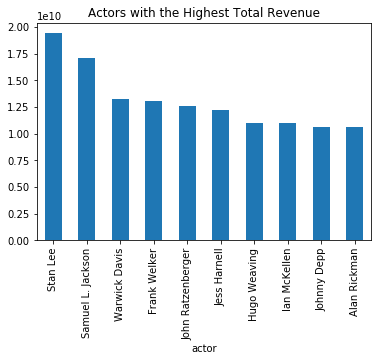

In [18]:
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

### Information-10: Directors with the Highest  Revenue

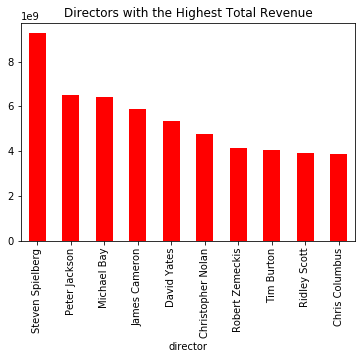

In [19]:
plt.title('Directors with the Highest Total Revenue')
movie_df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()

# Keyword Dataset

In [20]:
keywords = pd.read_csv('keywords.csv')
keywords.head(5)

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...

In [21]:
#  Extract keywords From Json Array

def clean_sentence(s, concat=None):
    s = s.translate(str.maketrans('', '', string.punctuation))
    s = s.lower()
    if concat:
        s = concat.join(s.split())
    return s

In [22]:
# Extract keywords From Json Array


keywords_len = len(keywords)
keywords_dict = {}
keywords_id_dict = {}

for it in range(keywords_len):
    keywords_arr = keywords.iloc[it]['keywords']
    keywords_arr = eval(keywords_arr)
    keywords_id_dict[keywords.iloc[it]['id']]=""
    for iit in range(len(keywords_arr)):
        keywords_id_dict[keywords.iloc[it]['id']] = keywords_id_dict[keywords.iloc[it]['id']] + clean_sentence(keywords_arr[iit]['name']) + " "
        if keywords_dict.get(keywords_arr[iit]['name']):
            keywords_dict[keywords_arr[iit]['name']] = keywords_dict[keywords_arr[iit]['name']]+1
        else:
            keywords_dict[keywords_arr[iit]['name']]=1

In [112]:
keyword_occurences = []
for k,v in keywords_dict.items():
    keyword_occurences.append([k,v])
keyword_occurences.sort(key = lambda x:x[1], reverse = True)

### Information-11: Keyword Wise popularity plot

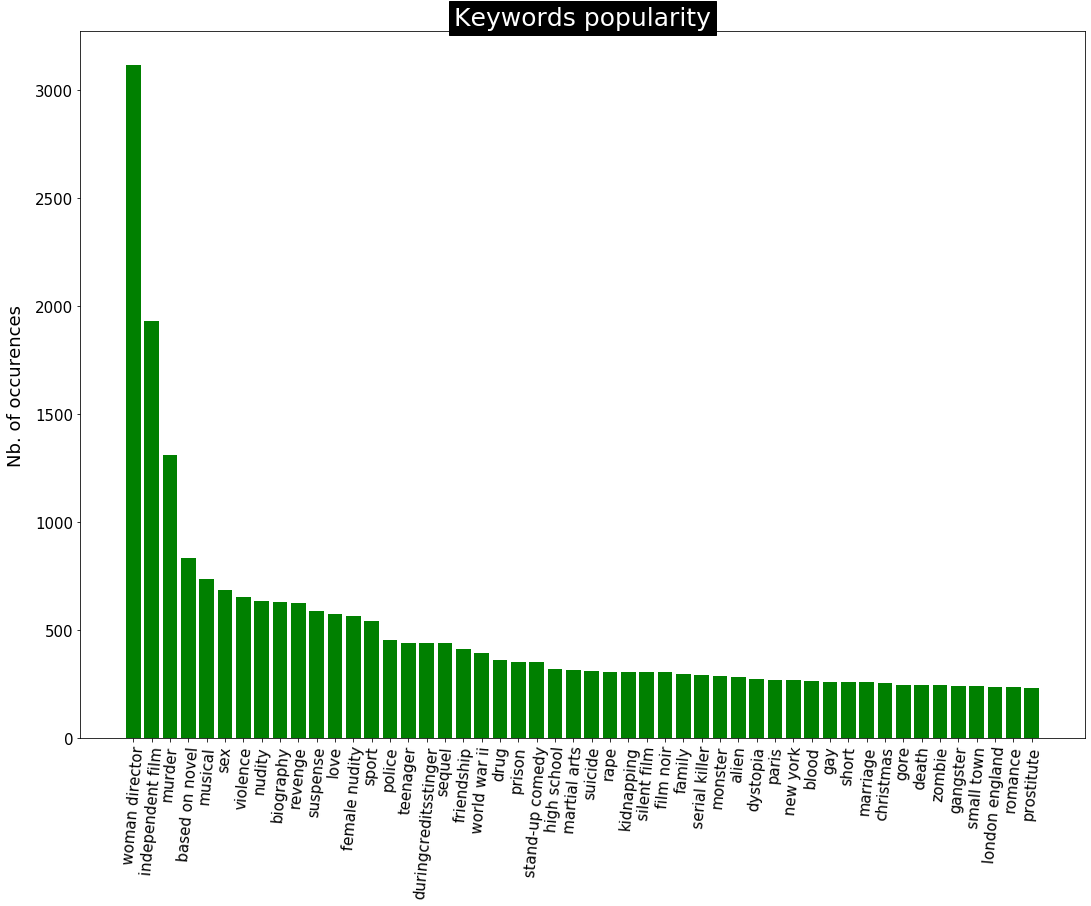

In [113]:
fig = plt.figure(1, figsize=(18,13))
ax = fig.add_subplot(1,1,1)
trunc_occurences = keyword_occurences[0:50]
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.bar(x_axis, y_axis, align = 'center', color='g')
#_______________________
plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

# links dataset

In [26]:
missing_values = ['na','--','?','-','None','none','non','NaN']
link_df = pd.read_csv('links.csv', na_values=missing_values)
missing_values = ['na','--','?','-','None','none','non','NaN']
link_df = pd.read_csv('links.csv', na_values=missing_values)
link_df.head(5)

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [28]:
missing_values = ['na','--','?','-','None','none','non','NaN']
ratings_df = pd.read_csv('ratings.csv', na_values=missing_values)
link_rating = link_df.merge(ratings_df, on='movieId')
link_rating.head()

movieId  imdbId  tmdbId  userId  rating   timestamp
0        1  114709   862.0       8     4.0  1013443596
1        1  114709   862.0       9     4.5  1073837180
2        1  114709   862.0      12     4.0   943912205
3        1  114709   862.0      20     4.0  1368361348
4        1  114709   862.0      24     4.0   979869938

In [29]:
from datetime import datetime

link_rating['timestamp'] = link_rating['timestamp'].apply(datetime.fromtimestamp)
link_rating['year'] = link_rating['timestamp'].dt.year
link_rating['month'] = link_rating['timestamp'].dt.month
link_rating = link_rating.sort_values('timestamp')
print('First 5:')
display(ratings_df.head())
print()
print('Last 5:')
display(ratings_df.tail())

First 5:


userId  movieId  rating   timestamp
0       1      110     1.0  1425941529
1       1      147     4.5  1425942435
2       1      858     5.0  1425941523
3       1     1221     5.0  1425941546
4       1     1246     5.0  1425941556


Last 5:


userId  movieId  rating   timestamp
26024284  270896    58559     5.0  1257031564
26024285  270896    60069     5.0  1257032032
26024286  270896    63082     4.5  1257031764
26024287  270896    64957     4.5  1257033990
26024288  270896    71878     2.0  1257031858

In [30]:
link_rating.drop_duplicates() 
link_rating.describe()

movieId        imdbId        tmdbId        userId        rating  \
count  2.602429e+07  2.602429e+07  2.601079e+07  2.602429e+07  2.602429e+07   
mean   1.584911e+04  2.953950e+05  1.602270e+04  1.350371e+05  3.528090e+00   
std    3.108526e+04  5.068961e+05  4.158878e+04  7.817620e+04  1.065443e+00   
min    1.000000e+00  1.000000e+00  2.000000e+00  1.000000e+00  5.000000e-01   
25%    1.073000e+03  9.742800e+04  6.750000e+02  6.716400e+04  3.000000e+00   
50%    2.583000e+03  1.162610e+05  5.259000e+03  1.351630e+05  3.500000e+00   
75%    6.503000e+03  2.573600e+05  1.135900e+04  2.026930e+05  4.000000e+00   
max    1.762750e+05  7.158814e+06  4.691720e+05  2.708960e+05  5.000000e+00   

               year         month  
count  2.602429e+07  2.602429e+07  
mean   2.006612e+03  6.565969e+00  
std    6.536728e+00  3.510570e+00  
min    1.995000e+03  1.000000e+00  
25%    2.001000e+03  3.000000e+00  
50%    2.006000e+03  7.000000e+00  
75%    2.013000e+03  1.000000e+01  
max    2.017000e+03  1.200000e+01

### Information-12: The user ratings for the movie_id == 1

In [31]:
movie_1 = link_rating[link_rating.movieId == 1]
movie_1.head(5)

movieId  imdbId  tmdbId  userId  rating           timestamp  year  \
30851        1  114709   862.0  126622     4.0 1996-01-29 01:00:00  1996   
26828        1  114709   862.0  109682     4.0 1996-01-30 00:54:20  1996   
23337        1  114709   862.0   95351     5.0 1996-02-01 15:33:23  1996   
49440        1  114709   862.0  202478     5.0 1996-02-01 20:48:55  1996   
52992        1  114709   862.0  217112     4.0 1996-02-02 11:01:54  1996   

       month  
30851      1  
26828      1  
23337      2  
49440      2  
52992      2

In [32]:
movie_1.groupby('rating').size()
movi1_1_data = movie_1.groupby('rating')
movi1_1_data.agg({'rating':'mean'})

rating
rating        
0.5        0.5
1.0        1.0
1.5        1.5
2.0        2.0
2.5        2.5
3.0        3.0
3.5        3.5
4.0        4.0
4.5        4.5
5.0        5.0

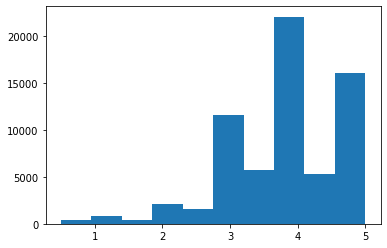

In [33]:
plt.hist(x=movie_1['rating'] )
plt.show()

### Information-12: Common ratings for the users

In [34]:
ratings_df.drop_duplicates()
ratings_df['timestamp'] = ratings_df['timestamp'].apply(datetime.fromtimestamp)
ratings_df['year'] = ratings_df['timestamp'].dt.year
ratings_df['month'] = ratings_df['timestamp'].dt.month
ratings_df = ratings_df.sort_values('timestamp')
print('First 5:')
display(ratings_df.head())
print()
print('Last 5:')
display(ratings_df.tail())

First 5:


userId  movieId  rating           timestamp  year  month
3662481    38150     1176     4.0 1995-01-09 12:46:44  1995      1
4313954    44717     1079     3.0 1995-01-09 12:46:49  1995      1
4313911    44717       47     5.0 1995-01-09 12:46:49  1995      1
4313905    44717       21     3.0 1995-01-09 12:46:49  1995      1
18389348  190860       21     5.0 1996-01-29 01:00:00  1996      1


Last 5:


userId  movieId  rating           timestamp  year  month
8285608    85434     3210     2.0 2017-08-04 08:38:59  2017      8
8286269    85434    82169     3.0 2017-08-04 08:39:06  2017      8
8285257    85434     1013     4.0 2017-08-04 08:41:23  2017      8
19224356  199634    60040     3.0 2017-08-04 08:53:43  2017      8
17280641  179412   167786     3.5 2017-08-04 08:57:50  2017      8

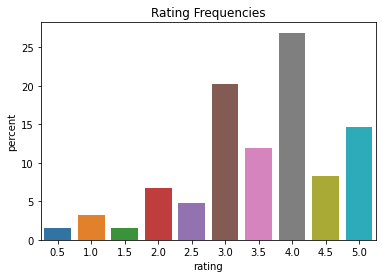

In [35]:
norm_counts = (
    ratings_df['rating']
    .value_counts(normalize=True, sort=False)
    .multiply(100)
    .reset_index()
    .rename(columns={'rating': 'percent', 'index': 'rating'})
)
ax = sns.barplot(x='rating', y='percent', data=norm_counts)
ax.set_title('Rating Frequencies')
plt.show()

### Information-13: Ratings submitted per month

In [37]:
month_counts = ratings_df[['year', 'month', 'rating']].groupby(['year', 'month']).count()
month_counts = month_counts.rename(index=str, columns={'rating': 'of_Ratings'})
month_counts = month_counts.reset_index()
month_counts['Date'] = month_counts[['year', 'month']].apply(
    lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1
)
month_counts = month_counts.set_index('Date', drop=True)
display(month_counts)


year month  of_Ratings
Date                              
1995-01-01  1995     1           4
1996-01-01  1996     1          66
1996-02-01  1996     2         588
1996-03-01  1996     3       10748
1996-04-01  1996     4       58825
...          ...   ...         ...
2017-04-01  2017     4      149999
2017-05-01  2017     5      206998
2017-06-01  2017     6      150953
2017-07-01  2017     7      192921
2017-08-01  2017     8       13357

[260 rows x 3 columns]

/home/hiren/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Rating per month in 1996')

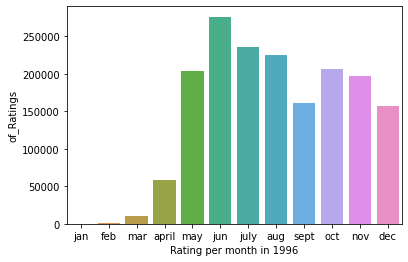

In [39]:
%matplotlib inline
from datetime import datetime
from IPython.display import Markdown
from os.path import join
from os.path import exists
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



a= month_counts[(month_counts["year"] == '1996' )]
sns.barplot(['jan', 'feb', 'mar', 'april', 'may', 'jun', 'july', 'aug', 'sept', 'oct', 'nov', 'dec'], a.of_Ratings)
plt.xlabel('Rating per month in 1996')

### Information-14: The ratings over time

In [41]:
month_counts = ratings_df.groupby(['year', 'month'])['rating'].agg([np.mean, np.std])
month_counts = month_counts.rename(index=str, columns={'mean': 'Rating'})
month_counts = month_counts.reset_index()
month_counts['Date'] = month_counts[['year', 'month']].apply(
    lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1
)
month_counts = month_counts.set_index('Date', drop=True)
display(month_counts)


year month    Rating       std
Date                                      
1995-01-01  1995     1  3.750000  0.957427
1996-01-01  1996     1  3.984848  1.270886
1996-02-01  1996     2  3.739796  1.282292
1996-03-01  1996     3  3.943338  1.047956
1996-04-01  1996     4  3.805967  1.044333
...          ...   ...       ...       ...
2017-04-01  2017     4  3.609374  1.075135
2017-05-01  2017     5  3.581286  1.040934
2017-06-01  2017     6  3.521642  1.071461
2017-07-01  2017     7  3.558550  1.076326
2017-08-01  2017     8  3.678708  1.057264

[260 rows x 4 columns]

/home/hiren/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'average Rating  per month in 2017')

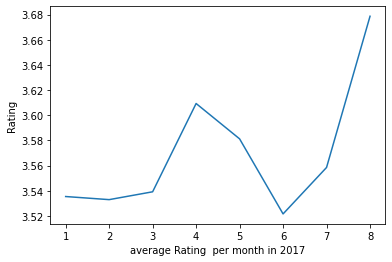

In [43]:
b= month_counts[(month_counts["year"] == '2017' )]
sns.lineplot(b.month, b.Rating)
plt.xlabel('average Rating  per month in 2017')

### Information-15: Distribution of unique users as per year

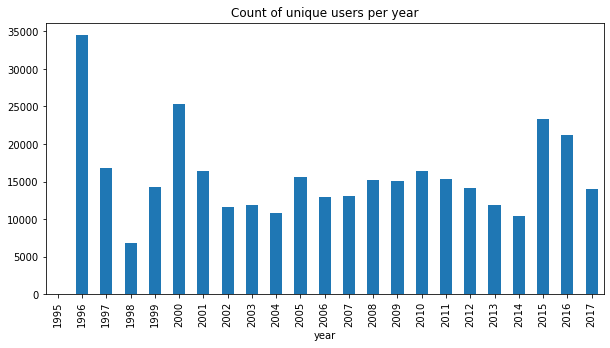

In [44]:
ratings_df[['year', 'userId']].groupby(['year'])['userId'].nunique().plot.bar(x='year', y='user_id', title='Count of unique users per year', figsize=(10, 5));


### Information-16: The merged dataset by userid vs rating  and plot the graphs

In [49]:
movie_df_small = movie_df[["id","genres","original_title"]]
ratings_df_small = ratings_df.rename(columns={'movieId': 'id'})

In [50]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan
movie_df_small['id'] = movie_df_small['id'].apply(convert_int)
ratings_df_small['id'] = ratings_df_small['id'].apply(convert_int)


<ipython-input-50-4a94b74e752c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
dataF = pd.merge(movie_df_small,ratings_df_small, on = 'id',how = 'inner')
dataF = dataF.drop('timestamp',axis = 1)
dataF.head(1)

id                                             genres original_title  \
0  862.0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...      Toy Story   

   userId  rating  year  month  
0  111040     4.0  1996      7

In [53]:
rating_user = dataF.groupby('userId').agg([np.mean,np.size])
rating_user_small  =rating_user[["rating"]]
rating_user_small

rating       
            mean   size
userId                 
1       4.045455   11.0
2       3.235294   17.0
3       3.125000    8.0
4       3.652174   23.0
5       4.200000   10.0
...          ...    ...
270892  3.552632   38.0
270893  3.402439   82.0
270894  2.560345   58.0
270895  4.235294   17.0
270896  3.965649  131.0

[265917 rows x 2 columns]

<AxesSubplot:xlabel='userId'>

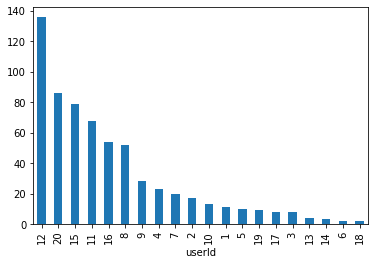

In [54]:
rating_user_small['rating']['size'].head(20).sort_values(ascending = False).plot(kind = 'bar')

# Thank You